<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/0502_ch8_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ch8. 텍스트 분석

- 텍스트 분류: 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법. 예를 들어 특정 신문 기사 내용이 연애/정치/사회/문화 중 어떤 카테고리에 속하는지 자동으로 분류하거나 스팸 메일 검출 같은 프로그램이 있음. 지도학습 적용

- 감성 분석: 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법을 총칭. 소셜 미디어 감정 분석, 영화나 제품에 대한 긍정 또는 리뷰, 여론조사 의견 분석등에 쓰임. 지도학습, 비지도학습 적용

- 텍스트 요약: 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법. ex) 토픽 모델링

- 텍스트 군집화와 유사도 측정: 비슷한 유형의 문서에 대해 군집화를 수행하는 기법. 텍스트 분류를 비지도학습으로 수행하는 방법.

##01. 텍스트 분석 이해

텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것, 비정형 텍스트 데이터를 **어떻게 피쳐 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는가**가 매우 중요

피처 벡터화: 텍스트를 word 기반의 다수 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자 값을 부여해 텍스트를 단어의 조합인 벡터값으로 표현하는 것

### 텍스트 분석 수행 프로세스

1. **텍스트 사전 준비작업(텍스트 전처리)**: 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제, 토큰화 작업, 의미 없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업

2. **피처 벡터화/추출**: 사전 주닙 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당. 대표적이 방법은 BOW와 Word2Vec

3. **ML 모델 수립 및 학습/예측/평가**: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행


### 파이썬 기반의 NLP, 텍스트 분석 패키지

- NLTK: 파이썬의 가장 대표적인 NLP 패키지. 방대한 데이터 셋과 서브 모듈을 가지고 있음. 수행 속도 측면에서 아쉬움

- Gensim: 토픽 모델링 분야에서 가장 두각을 나타냄

- SpaCy: 뛰어난 수행 성능으로 최근 가장 주목받는 NLP 패키지

##02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

텍스트 정규화: 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것

### 클랜징
텍스트에서 분석에 방해되는 불필요한 문자, 기호 등을 사전에 제거하는 작업(ex. HTML, XML 태그나 특정 기호 사전에 제거)

### 텍스트 토큰화
- **문장 토큰화**: 문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리

In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
        
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)
#각각의 문장으로 구성된 list 객체 반환

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- 단어 토큰화: 기본적으로 공백, 콤마, 마침표 등으로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화를 수행

Bag of Word 와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 됨

In [2]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room. '
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
#sent_tokenize와 word_tokenize를 조합해 문서에 대해서 모든 단어를 토큰화
from nltk import sent_tokenize, word_tokenize

def tokenize_text(text):
  sentences = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리해내는 것. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행

### 스톱 워드 제거
분석에서 큰 의미가 없는 단어를 제거 ex) is, the, a, will 등

언어별로 스톱 워드가 목록화 되어 있음

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words = []
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    #소문자를 모두 변환합니다.
    word = word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 과정

Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음

In [9]:
#stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))
#정확한 원형을 찾지 못하고 다른 어근 단어로 인식하는 경우가 발생

work work work
amus amus amus
happy happiest
fant fanciest


In [10]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'), lemma.lemmatize('amuses','v'), lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'), lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'), lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
amuse amuse amuse
happy happy
fancy fancy


## 03. Bag of Words - BOW

**Bag of Words** 모델: 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

문장 1:

'My Wife likes to watch baseball games and my daughter likes to watch baseball games too'

문장 2:

'My wife likes to play baseball'

1. 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어를 칼럼 형태로 나열. 이후 각 단어에 고유의 인덱스를 부여

2. 개별 문장에서 해당 단어가 나타나는 횟수(Occurrence)를 각 단어에 기재.

BOW 기반 NLP 연구의 한계
- 문맥 의미 반영 부족
- 희소 행렬 문제

### BOW 피처 벡터화

BOW 모델에서의 피처 벡터화: 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 과정

- **카운트 기반의 벡터화**: 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수를 부여하는 경우. 카운트 값이 높을수록 중요한 단어로 인식

- **TF-IDF 기반의 벡터화**: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여

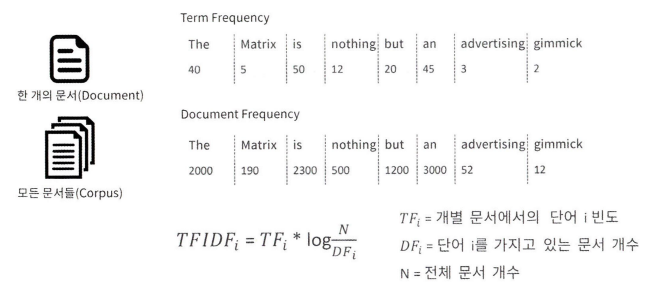

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer

CountVectorizer 클래스: 카운트 기반의 벡터화를 구현한 클래스. 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행

<파라미터>
- max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터.
- min_df: 전체 문서에 걸쳐서 너무 낮은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
- max_features: 추출하는 피처의 개수를 제한하며 정수로 값을 지정
- stop_words: 'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외
- analyzer: 피처 추출을 수행한 단위를 지정

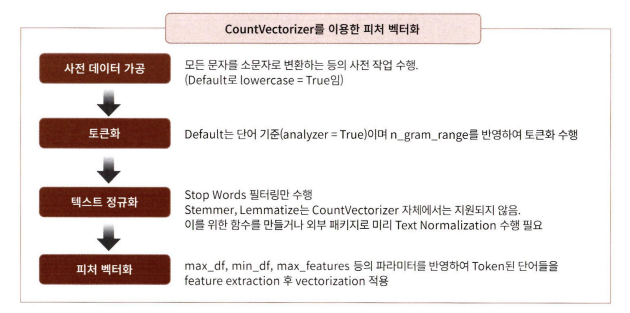

### BOW 벡터화를 위한 희소 행렬

**희소 행렬**: 대규모 행렬의 대부분의 값을 0이 차지하는 행렬. BOW 형태의 언어 모델 피처 벡터화에 이용

- **COO 형식**: 0이 아닌 데이터만 별도의 데이터 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 정하는 방식

In [11]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [12]:
#coo_matrix 클래스를 이용해 COO 형식의 희소 행렬로 변환
from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3,1,2])

#행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [13]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- **CSR 형식**: COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결해, 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식

In [16]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

#0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

#행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

#COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())


COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [17]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)


##05. 감성 분석

감성 분석: 문서의 주관적인 감성/의견/감정/ 기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용. 긍정 감성 지수와 부정 감성 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결정

- 지도학습: 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일

- 비지도학습: 'Lexicon'이라는 일종의 감성 어휘 사전을 이용. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문석의 긍정적, 부정적 감성 여부를 판단





### 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
import pandas as pd

review_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [20]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [21]:
#데이터 정규화
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

#파이썬의 정규 표현식 모듈인 re를 이ㅛㅇ해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ",x))

In [22]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

#스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization 수행
#LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
                     ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.8860, ROC-AUC는 0.9503


In [24]:
#스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 TF-IDF 수행
#LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
                     ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


### 비지도학습 기반 감성 분석 소개

Lexicon 기반(한글 지원x)

- SentiWordNet: NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것. WordNet의 Synset 개념을 감성 분석에 적용. WordNet의 Synset별로 3가지 감성 점수를 할당(긍정 감성 지수, 부정 감성 지수, 객관성 지수)

- VADER: 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지. 비교적 빠른 수행 시간을 보장

- Pattern: 예측 성능 측면에서 가장 주목 받는 패키지


### SentiWordNet을 이용한 감성 분석


In [25]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [26]:
from nltk.corpus import wordnet as wn

term = 'present'

#'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)

print('synsets() 반환 type: ', type(synsets))
print('synsets() 반환 값 갯수: ', len(synsets))
print('synsets() 반환 값: ', synsets)

synsets() 반환 type:  <class 'list'>
synsets() 반환 값 갯수:  18
synsets() 반환 값:  [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [27]:
for synset in synsets :
    print('##### Synset name: ', synset.name(),'#####')
    print('POS: ',synset.lexname())
    print('Definition: ',synset.definition())
    print('Lemmas: ',synset.lemma_names())

##### Synset name:  present.n.01 #####
POS:  noun.time
Definition:  the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas:  ['present', 'nowadays']
##### Synset name:  present.n.02 #####
POS:  noun.possession
Definition:  something presented as a gift
Lemmas:  ['present']
##### Synset name:  present.n.03 #####
POS:  noun.communication
Definition:  a verb tense that expresses actions or states at the time of speaking
Lemmas:  ['present', 'present_tense']
##### Synset name:  show.v.01 #####
POS:  verb.perception
Definition:  give an exhibition of to an interested audience
Lemmas:  ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name:  present.v.02 #####
POS:  verb.communication
Definition:  bring forward and present to the mind
Lemmas:  ['present', 'represent', 'lay_out']
##### Synset name:  stage.v.01 #####
POS:  verb.creation
Definition:  perform (a play), especially on a stage
Lemmas:  ['stage', 'present', 're

In [28]:
#synset 객체를 단어별로 생성
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

#단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
    similarities.append(similarity)
    
#개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장 
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [29]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type: ', type(senti_synsets))
print('senti_synsets() 반환 값 갯수: ', len(senti_synsets))
print('senti_synsets() 반환 값: ', senti_synsets)

senti_synsets() 반환 type:  <class 'list'>
senti_synsets() 반환 값 갯수:  11
senti_synsets() 반환 값:  [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [30]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


### SentiWordNet을 이용한 영화 감상평 감상 분석

1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태킹
3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

In [31]:
from nltk.corpus import wordnet as wn

#간단한 NTLK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return

In [35]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [36]:
review_df['preds'] = review_df['review'].apply(lambda x : swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_target, preds))
print("정확도: ", np.round(accuracy_score(y_target , preds), 4))
print("정밀도: ", np.round(precision_score(y_target , preds),4))
print("재현율: ", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도:  0.6613
정밀도:  0.6472
재현율:  0.7091


### VADER를 이용한 감성 분석

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    #compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

#apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target , vader_preds),4))
print("정밀도:", np.round(precision_score(y_target , vader_preds),4))
print("재현율:", np.round(recall_score(y_target, vader_preds),4))


[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.6948
정밀도: 0.6485
재현율: 0.8506


정확도가 SentiWordNet보다 향상됐고, 특히 재현율은 약 85.06%로 매우 크게 향상됨